C:\Users\Harout\AppData\Local\Temp\ipykernel_8344\3935645073.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="2y", interval="1d")
[*********************100%***********************]  1 of 1 completed


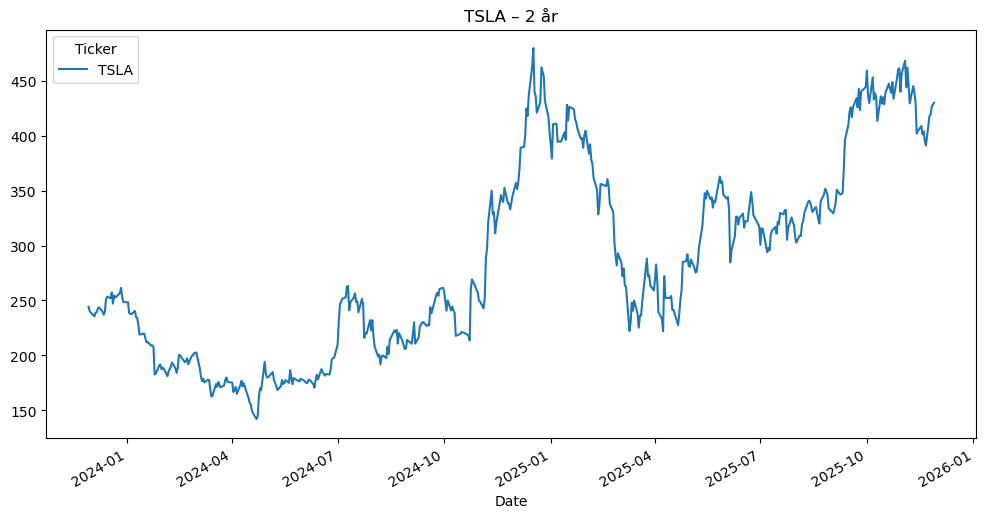

In [3]:
# ╔══════════════════════════════════════════╗
# ║  UPPGIFT 3 – Egen trading-logik från grunden ║
# ╚══════════════════════════════════════════╝

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. Hämta data för en aktie (vi kör Tesla som exempel)
ticker = "TSLA"
data = yf.download(ticker, period="2y", interval="1d")
data['Close'].plot(title=f"{ticker} – 2 år", figsize=(12,6))
plt.show()

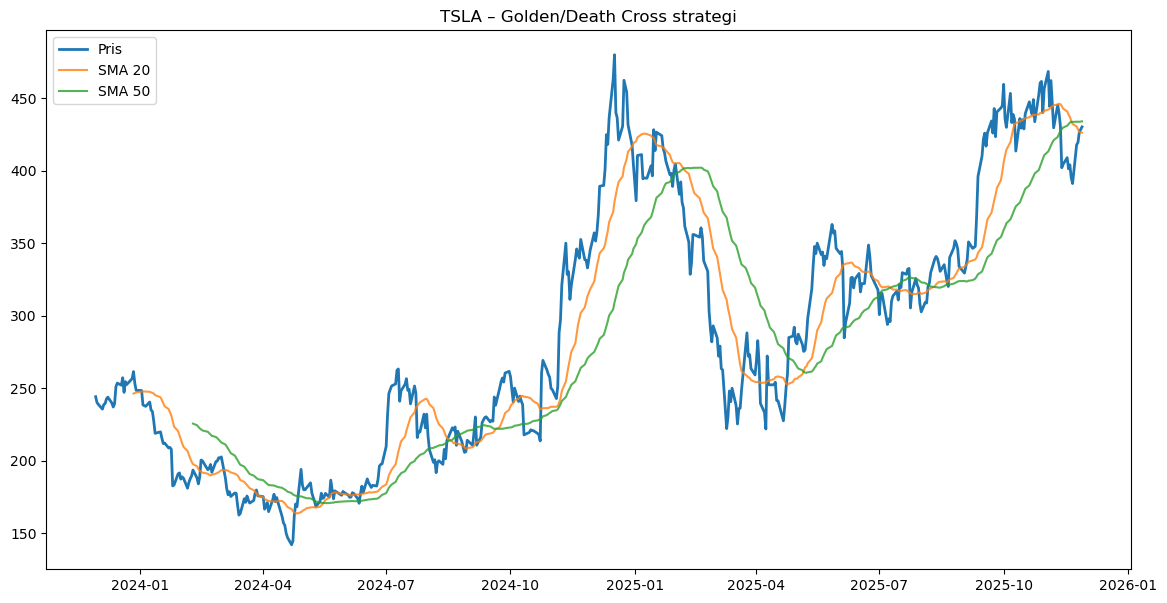

In [4]:
# 2. Räkna glidande medelvärden (SMA = Simple Moving Average)
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()

# Plotta pris + båda medelvärden
plt.figure(figsize=(14,7))
plt.plot(data.index, data['Close'], label="Pris", linewidth=2)
plt.plot(data.index, data['SMA_20'], label="SMA 20", alpha=0.8)
plt.plot(data.index, data['SMA_50'], label="SMA 50", alpha=0.8)
plt.legend()
plt.title(f"{ticker} – Golden/Death Cross strategi")
plt.show()

In [5]:
# 3. Skapa köp- och säljsignaler (Golden Cross / Death Cross)
data['Signal'] = 0
data['Signal'][20:] = np.where(data['SMA_20'][20:] > data['SMA_50'][20:], 1, 0)
data['Köp/Sälj'] = data['Signal'].diff()   # 1 = köp, -1 = sälj

# Visa de senaste signalerna
print(data[['Close', 'SMA_20', 'SMA_50', 'Köp/Sälj']].tail(10))

NameError: name 'np' is not defined

KeyError: 'Köp/Sälj'

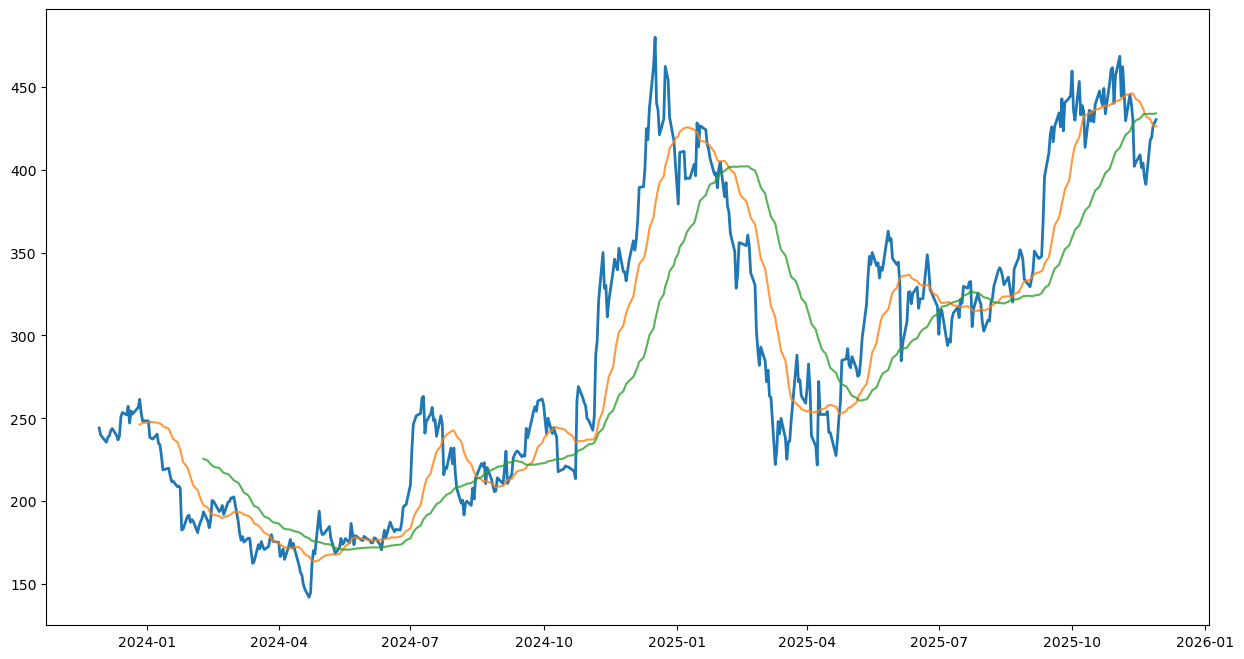

In [7]:
# 4. Plotta signalerna på grafen
plt.figure(figsize=(15,8))
plt.plot(data.index, data['Close'], label="Pris", linewidth=2)
plt.plot(data.index, data['SMA_20'], label="SMA 20", alpha=0.8)
plt.plot(data.index, data['SMA_50'], label="SMA 50", alpha=0.8)

# Köpsignaler (gröna pilar)
plt.plot(data[data['Köp/Sälj'] == 1].index,
         data['SMA_20'][data['Köp/Sälj'] == 1],
         '^', markersize=15, color='green', label='KÖP')

# Säljsignaler (röda pilar)
plt.plot(data[data['Köp/Sälj'] == -1].index,
         data['SMA_20'][data['Köp/Sälj'] == -1],
         'v', markersize=15, color='red', label='SÄLJ')

plt.legend()
plt.title(f"{ticker} – Dina första automatiska köp- och säljsignaler!")
plt.show()

In [8]:
# 5. Din egen funktion – återanvändbar för VALFRI aktie!
def golden_cross_signaler(ticker, kort=20, lång=50):
    data = yf.download(ticker, period="2y")
    data['SMA_kort'] = data['Close'].rolling(kort).mean()
    data['SMA_lång'] = data['Close'].rolling(lång).mean()
    data['Signal'] = np.where(data['SMA_kort'] > data['SMA_lång'], 1, 0)
    data['Köp/Sälj'] = data['Signal'].diff()
    return data

# Testa på flera aktier direkt
for t in ["INVE-B.ST", "VOLV-B.ST", "NVDA", "SEB-A.ST"]:
    df = golden_cross_signaler(t)
    senaste = df['Köp/Sälj'].iloc[-100:].sum()
    print(f"{t}: {senaste} signaler senaste 100 dagarna")

C:\Users\Harout\AppData\Local\Temp\ipykernel_8344\1484582902.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, period="2y")
[*********************100%***********************]  1 of 1 completed


NameError: name 'np' is not defined